In [1]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 

In [2]:
import os
os.getcwd()

'/home/ayush/Downloads/All Project/Natural Language Programming-20230826T130018Z-001-20230905T171930Z-001/Natural Language Programming-20230826T130018Z-001/MachineLearning/ML Concept/Handling_Missing_Values'

In [3]:
os.chdir('//home/ayush//Downloads//All Project//Natural Language Programming-20230826T130018Z-001-20230905T171930Z-001//Natural Language Programming-20230826T130018Z-001//MachineLearning//ML Concept//datasets')

In [4]:
cd datasets

[Errno 2] No such file or directory: 'datasets'
/home/ayush/Downloads/All Project/Natural Language Programming-20230826T130018Z-001-20230905T171930Z-001/Natural Language Programming-20230826T130018Z-001/MachineLearning/ML Concept/Handling_Missing_Values


In [5]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
titanic['Age'].isnull().value_counts()

Age
False    332
True      86
Name: count, dtype: int64

In [7]:
titanic['Age'].isnull().value_counts()

Age
False    332
True      86
Name: count, dtype: int64

In [8]:
titanic['Cabin'].isnull().value_counts()

Cabin
True     327
False     91
Name: count, dtype: int64

In [9]:
titanic['Fare'].isnull().value_counts()

Fare
False    417
True       1
Name: count, dtype: int64

In [10]:
titanic.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [11]:
cca_col = [var for var in titanic.columns if titanic[var].isnull().mean()<0.05 and titanic[var].isnull().mean()>0]

In [12]:
cca_col

['Fare']

In [13]:
len(titanic[cca_col].dropna())/len(titanic)
# we can perform complete case analysis

0.9976076555023924

In [14]:
len(titanic['Age'].dropna())/len(titanic) 
# So we can not drop all the rows of Age due to high data lose

0.7942583732057417

In [15]:
new_df = titanic[cca_col].dropna()
new_df

,Fare
0,7.8292
1,7.0000
2,9.6875
3,8.6625
4,12.2875
...,...
413,8.0500
414,108.9000
415,7.2500
416,8.0500


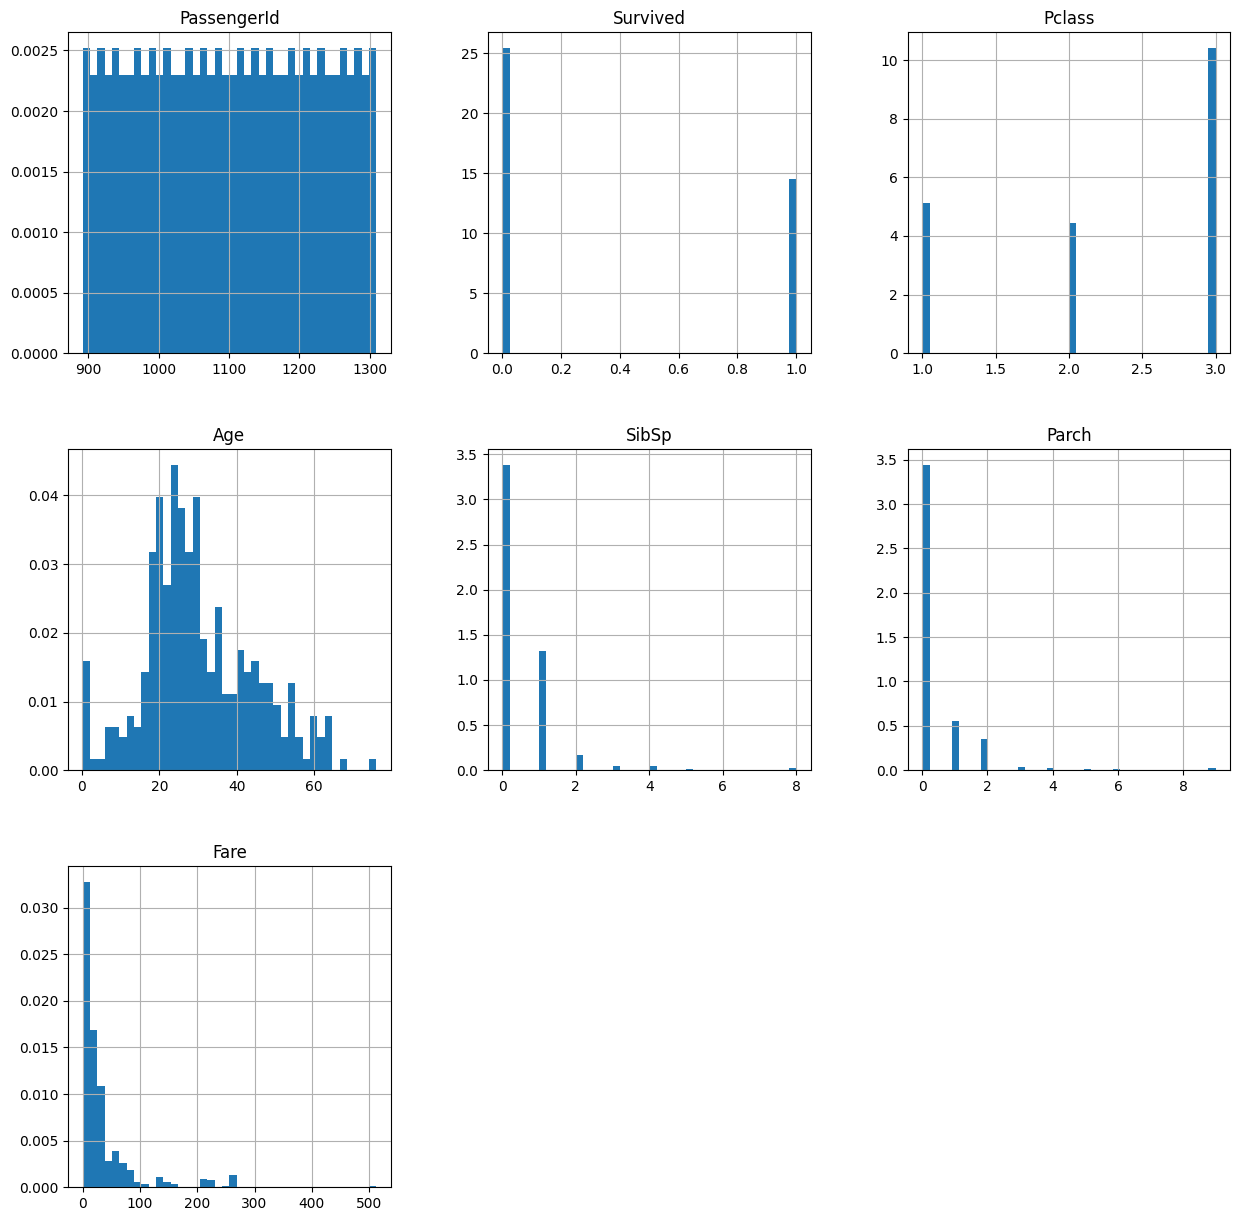

<Axes: ylabel='Density'>

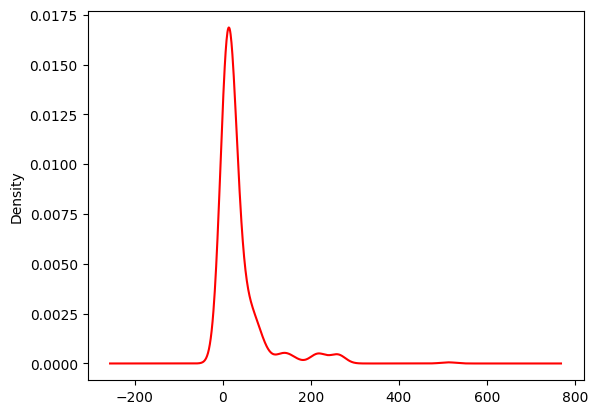

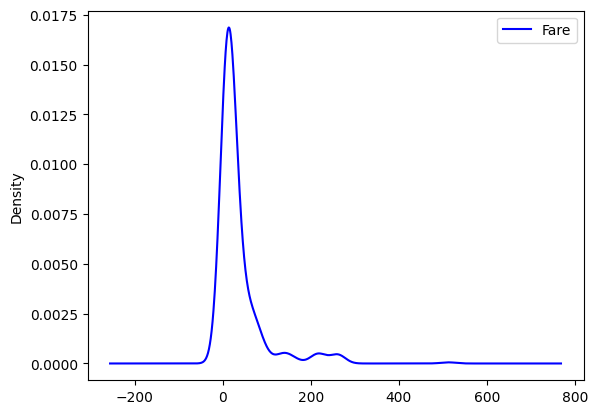

In [16]:
titanic.hist(bins=40,density=True,figsize =(15,15))
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
titanic['Fare'].plot.density(color='red')
new_df[cca_col].plot.density(color='blue')